# Avacado classification and regression problem

##  Predicting the average price of the avacado(Regression)

## 1.Problem definition
>We have the retail scan data for avacado with 9 features in it we should train the model on this dataset for predicting the average price.

## 2.Data
 1.The original datase is downloaded from : http://www.hassavocadoboard.com/retail/volume-and-price-data.
 
 2.However we downloaded the dataset from : https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects
 
 The original dataset has `2000` rows but here we have `1500` rows

## 3.Evaluation
>If we can reach above 80% accuracy with our model for prediciting the average price we will pursue the project

## 4. Features

Data dictionary of avacado:-
   * 1. Date - The date of the observation
   * 2. AveragePrice - the average price of a single avocado
   * 3. type - conventional or organic
   * 4. year - the year
   * 5. Region - the city or region of the observation
   * 6. Total Volume - Total number of avocados sold
   * 7. 4046 - Total number of avocados with PLU 4046 sold
   * 8. 4225 - Total number of avocados with PLU 4225 sold
   * 9. 4770 - Total number of avocados with PLU 4770 sold


## Preparing tools

In [1]:
#lets import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

#metrics for regression 
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

#models on which are going to train our data
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#lets filter the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  
3  2015.0  Albany  
4  2015.0  Albany

In [3]:
#lets drop the column unnamed which is useless
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [5]:
#lets check for the missing values
df.isna().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

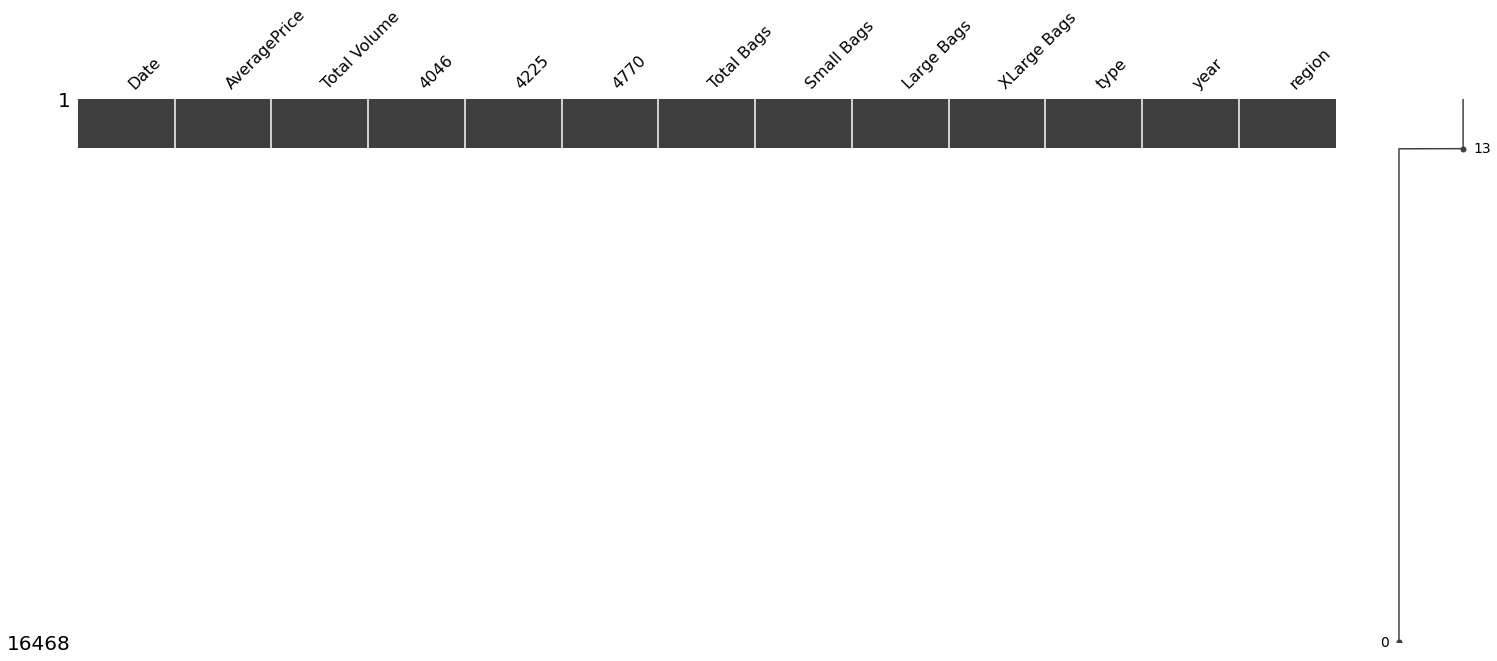

In [6]:
missingno.matrix(df);

* We can see that plenty of empty rows is available in dataset so lets remove that

In [7]:
#lets drop the empty rows
df.dropna(inplace = True)

In [8]:
#Now lets check for missing values 
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* Now we can see that the empty rows are dropped

## Exploratory data analysis

In [9]:
df.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [10]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03   
mean       1.074990  1.601879e+06  6.464387e+05  6.114375e+05  5.040550e+04   
std        0.188891  4.433143e+06  1.947614e+06  1.672906e+06  1.377812e+05   
min        0.490000  3.875074e+04  4.677200e+02  1.783770e+03  0.000000e+00   
25%        0.980000  1.474700e+05  2.040034e+04  4.147606e+04  9.112500e+02   
50%        1.080000  4.027919e+05  8.175117e+04  1.186649e+05  7.688170e+03   
75%        1.190000  9.819751e+05  3.775785e+05  4.851503e+05  2.916730e+04   
max        1.680000  4.465546e+07  1.893304e+07  1.895648e+07  1.381516e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags         year  
count  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000  1517.000000  
mean   2.935974e+05  2.487736e+05  4.264205e+04    2181.771074  2015.162821  
std    7.579765e+05  6.474765e+05  1.182157e+05    7455.712144     0.369324  
min    3.311770e+03  3.311770e+03  0.000000e+00       0.000000  2015.000000  
25%    3.620689e+04  2.972722e+04  5.407400e+02       0.000000  2015.000000  
50%    7.397906e+04  6.237569e+04  5.044350e+03       0.000000  2015.000000  
75%    1.576097e+05  1.461994e+05  2.926767e+04     401.480000  2015.000000  
max    6.736304e+06  5.893642e+06  1.121076e+06  108072.790000  2016.000000

In [11]:
#lets check the region wise total volume
region = pd.DataFrame(df.groupby(['region'])['Total Volume'].mean())
region

Total Volume
region                           
Albany               7.629020e+04
Atlanta              4.676372e+05
BaltimoreWashington  8.076442e+05
Boise                8.104617e+04
Boston               5.534586e+05
BuffaloRochester     1.321844e+05
California           6.035277e+06
Charlotte            1.762781e+05
Chicago              8.118822e+05
Columbus             1.457604e+05
DallasFtWorth        1.195363e+06
Denver               7.176015e+05
Detroit              3.390654e+05
GrandRapids          1.908866e+05
GreatLakes           3.276358e+06
HarrisburgScranton   2.183198e+05
HartfordSpringfield  2.685772e+05
Houston              1.115564e+06
Indianapolis         1.575043e+05
Jacksonville         1.380222e+05
LasVegas             2.790102e+05
LosAngeles           2.732180e+06
Louisville           7.764284e+04
MiamiFtLauderdale    4.713218e+05
Midsouth             2.355099e+06
Nashville            1.674714e+05
NewYork              1.362973e+06
Northeast            3.465864e+06
NorthernNewEngland   3.959559e+05
Orlando              3.013391e+05
Philadelphia         3.849221e+05
PhoenixTucson        1.088699e+06
Pittsburgh           8.143082e+04
Plains               1.672975e+06
Portland             4.951845e+05
RaleighGreensboro    2.405372e+05
RichmondNorfolk      1.967580e+05
Roanoke              1.308864e+05
SanDiego             5.013533e+05
SanFrancisco         8.501176e+05
Seattle              4.895311e+05
SouthCarolina        3.337852e+05
SouthCentral         5.496995e+06
Southeast            3.055239e+06
Spokane              7.718453e+04
StLouis              1.944995e+05
Syracuse             4.857841e+04
Tampa                3.279430e+05
TotalUS              3.293714e+07
West                 5.574939e+06
WestTexNewMexico     8.602926e+05

In [12]:
#lets check the year wise sales
year = pd.DataFrame(df.groupby(['year'])['Total Volume'].mean())
year

Total Volume
year                
2015.0  1.610065e+06
2016.0  1.559787e+06

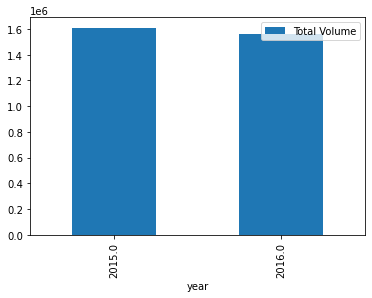

In [13]:
#lets plot year variations
year.plot.bar();

* `2015` has more volume than `2016`

In [14]:
#lets check in which year avacado costed more than its average price
df[df['AveragePrice'] > df['AveragePrice'].mean()][['AveragePrice', '4046','4225','4770', 'year']].sort_values('AveragePrice')

AveragePrice        4046        4225       4770    year
702           1.08     2770.62   230517.24     140.77  2015.0
1392          1.08     3871.79   438210.92   43926.90  2016.0
632           1.08    86390.93     6821.52   11458.43  2015.0
633           1.08   104187.91     7723.68   10813.59  2015.0
640           1.08    97216.47     8423.57   12187.72  2015.0
...            ...         ...         ...        ...     ...
1413          1.63     1426.31    52281.34      27.83  2016.0
1508          1.64    49399.39    26597.39   22714.68  2016.0
1411          1.66      960.31    54243.42      22.85  2016.0
1458          1.68  1126017.42  1186843.99   92064.47  2016.0
1457          1.68  1111431.87  1333386.69  120964.40  2016.0

[781 rows x 5 columns]

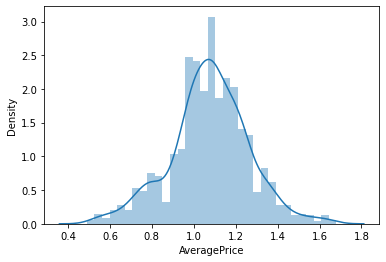

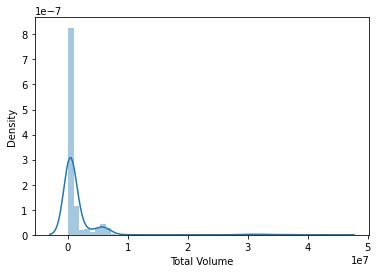

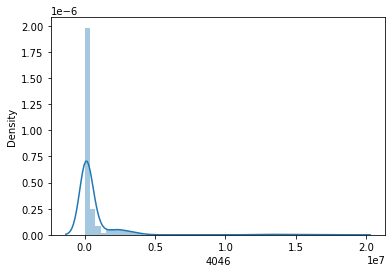

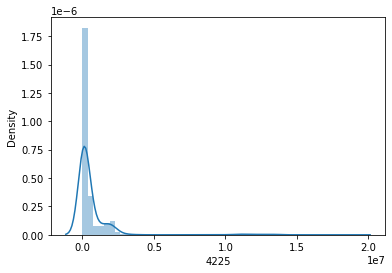

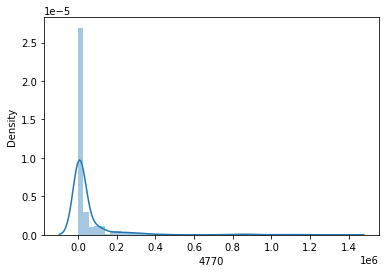

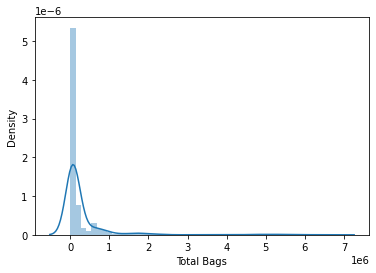

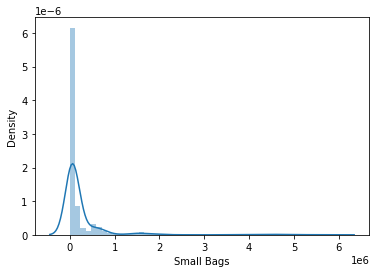

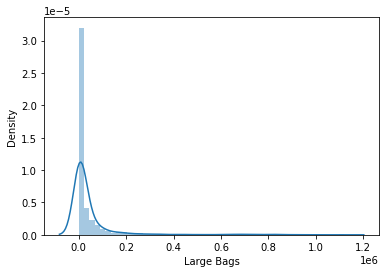

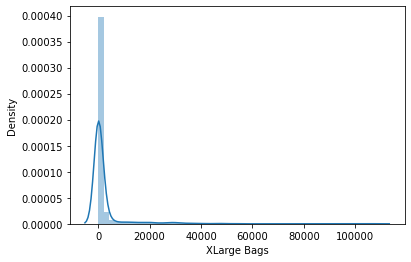

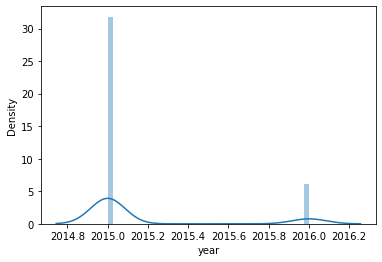

In [15]:
#lets check the ditribution of the features
for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        sns.distplot(df[i])
        plt.show()

* We can see the skewness in some features

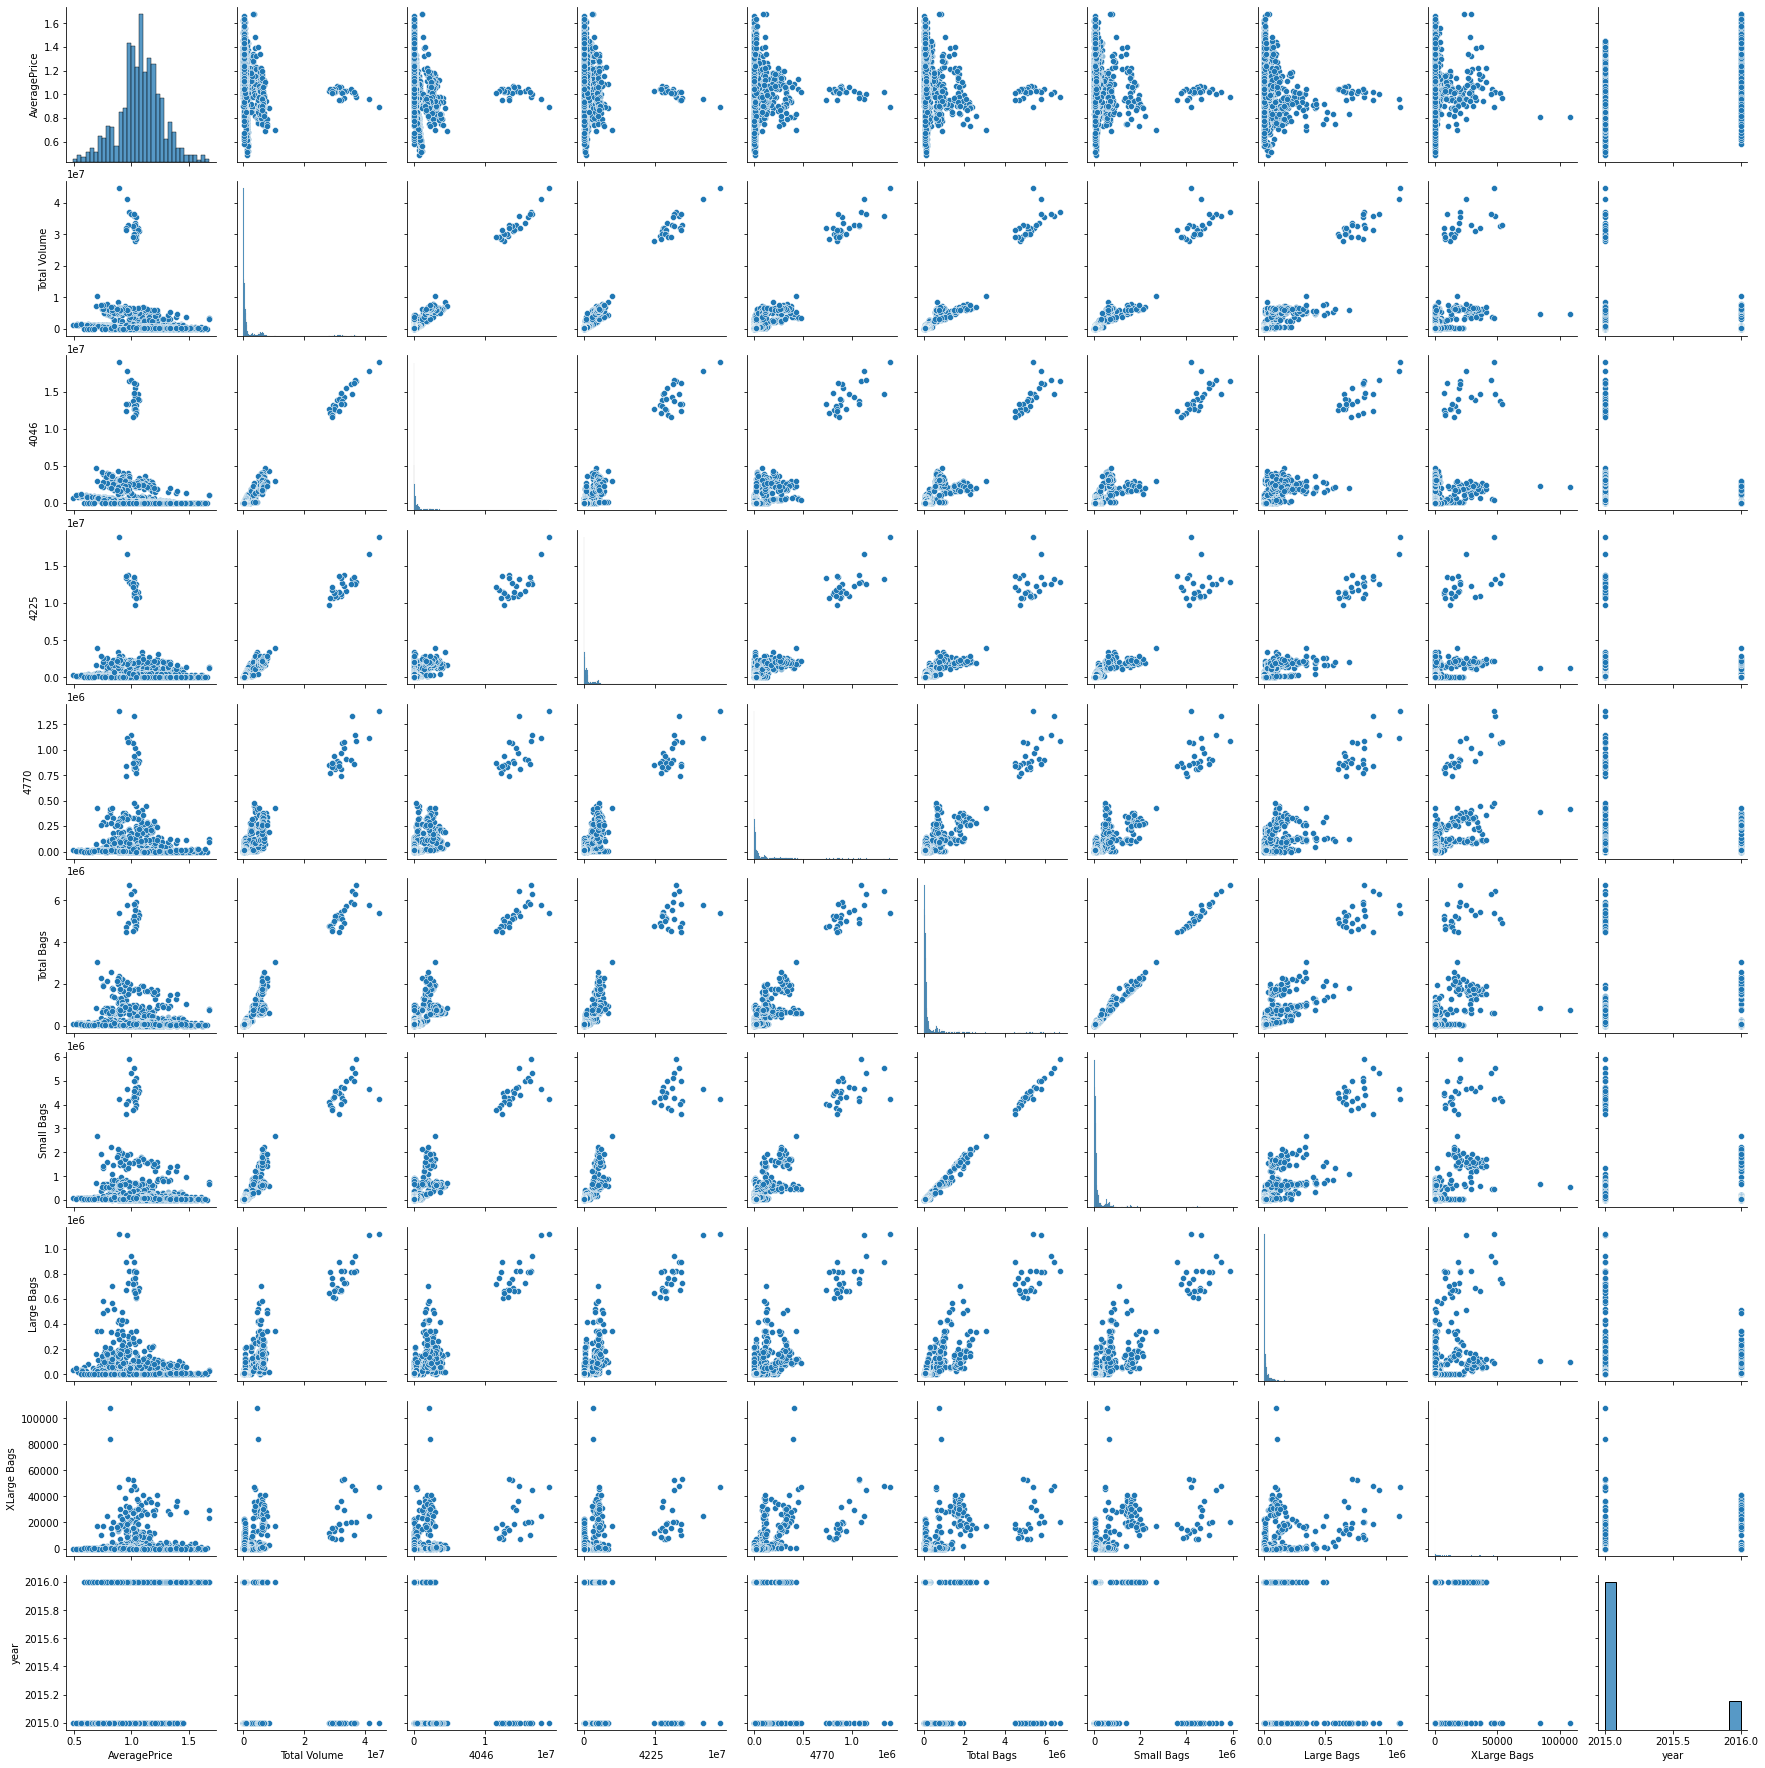

In [16]:
sns.pairplot(df);

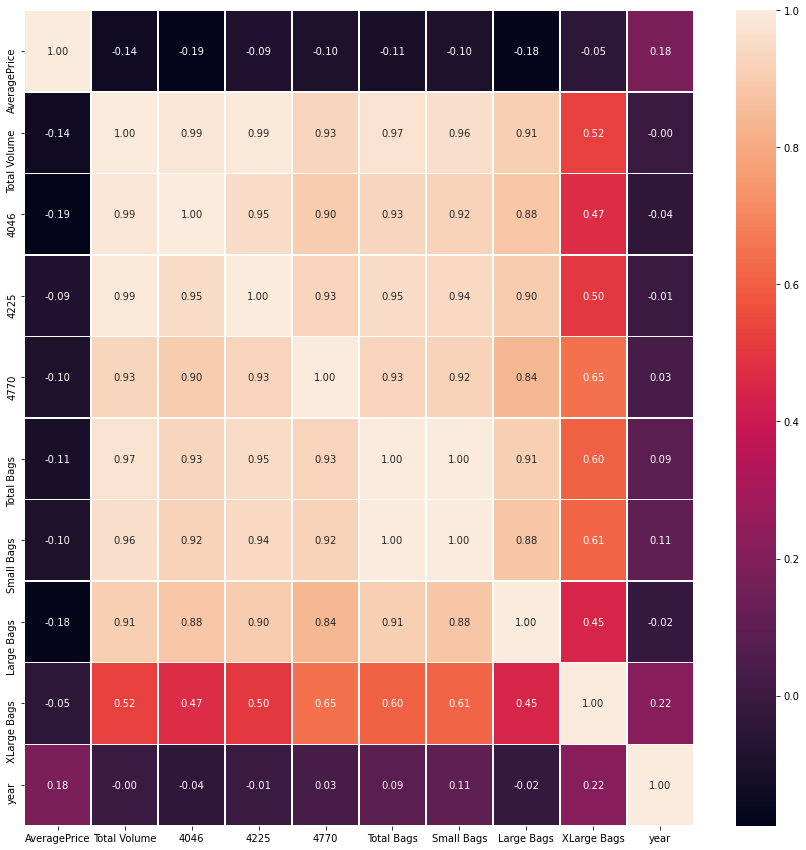

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr,
            annot= True,
            fmt = '.2f',
            linewidth = .5);

In [17]:
import plotly.graph_objects as go
df_datewise = df.groupby(['Date'])['Total Volume'].sum()
df_datewise = pd.DataFrame(df_datewise,columns =  ['Total Volume'] )
df_datewise

Total Volume
Date                    
01-02-2015   68722867.16
01-03-2015   56849850.55
01-05-2016   10296641.30
01-11-2015   20569407.74
02-08-2015   24045693.94
...                  ...
30-08-2015   24616165.56
30-10-2016    3400952.66
31-01-2016    8592097.63
31-05-2015   66088523.20
31-07-2016    6564198.36

[104 rows x 1 columns]

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_datewise.index, y = df_datewise['Total Volume'],
                        mode = 'lines'))
fig.update_layout(
title = 'Total volume based on date',
xaxis_title = 'Date',
yaxis_title = 'Total Volume')
fig.show()

In [19]:
#lets check for the weekend and weekdays
import datetime
df['weekdays'] = ((pd.DatetimeIndex(df['Date']).dayofweek)// 5 == 1).astype('float')

In [20]:
daywise = df.groupby(['weekdays'])['Total Volume'].sum()
daywise.head()

weekdays
0.0    8.137392e+08
1.0    1.616311e+09
Name: Total Volume, dtype: float64

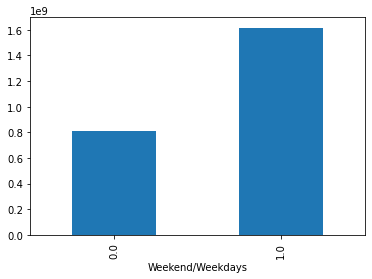

In [22]:
daywise.plot.bar()
plt.xlabel('Weekend/Weekdays');

In [23]:
#From the analysis we can see that date and weekdays feature is not correlated with the target variable
df.drop('Date',axis = 1,inplace = True)


In [24]:
for i in df.columns:
    if not pd.api.types.is_numeric_dtype(df[i]):
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
        

In [25]:
#lets check for the skewness
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
weekdays       -0.836741
dtype: float64

* Data is highly skewed in some features lets try to treat the skewness

In [40]:
#lets treat the skewness with log method
for cols in df.columns:
    if df.skew().loc[cols] > 0.5:
        df[cols] = np.sqrt(df[cols])        

In [41]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.890082
4046            0.163511
4225            0.446312
4770            0.296215
Total Bags      0.956575
Small Bags      0.961554
Large Bags     -0.599991
XLarge Bags     0.254367
type            0.000000
year            1.828332
region          0.288146
weekdays       -0.836741
dtype: float64

* Here we treated the skewness of most features

> As we got less amount of features there is no need of applying PCA technique here

## Building Model

In [42]:
#lets split the data
X = df.drop('AveragePrice',axis = 1)
y = df['AveragePrice']

from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_new = sd.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                           y,
                                                           test_size = 0.2)

### Lets train the data on various models and see for which model performs good without any hyperparameter tuning

In [44]:
model = [LinearRegression(),SVR(),KNeighborsRegressor(),Lasso(),Ridge(), DecisionTreeRegressor()]
for i in model:
    i.fit(X_train, y_train)
    predi = i.predict(X_test)
    print('score of', i ,'is:', i.score(X_train,y_train))
    print('mean_absolute_error :', mean_absolute_error(y_test,predi))
    print('mean_squared_error :', mean_squared_error(y_test, predi))
    print('Root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, predi)))
    print('r2_score :', r2_score(y_test, predi))
    print('\n')

score of LinearRegression() is: 0.37865891026673315
mean_absolute_error : 0.11663396622705813
mean_squared_error : 0.021853564444975253
Root_mean_squared_error : 0.1478295114142479
r2_score : 0.41873128800006765


score of SVR() is: 0.7807097347084878
mean_absolute_error : 0.07963296986151112
mean_squared_error : 0.0098479220169698
Root_mean_squared_error : 0.09923669692694231
r2_score : 0.7380615431824447


score of KNeighborsRegressor() is: 0.8226498478981569
mean_absolute_error : 0.07382236842105264
mean_squared_error : 0.010711355263157895
Root_mean_squared_error : 0.10349567750953609
r2_score : 0.7150956452314094


score of Lasso() is: 0.0
mean_absolute_error : 0.15177916323165705
mean_squared_error : 0.037596911678270194
Root_mean_squared_error : 0.193899230731507
r2_score : -1.5740289367460747e-05


score of Ridge() is: 0.37842260043597753
mean_absolute_error : 0.11671936405103239
mean_squared_error : 0.021908019550666014
Root_mean_squared_error : 0.14801357894012973
r2_score : 

## Lets try  ensemble technique

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
rf_pred = rf.predict(X_test)
print('r2_score :', r2_score(y_test, rf_pred))
print('mean_absolute_error :', mean_absolute_error(y_test, rf_pred) )
print('mean_squared_error :', mean_squared_error(y_test, rf_pred))


r2_score : 0.8429083499891998
mean_absolute_error : 0.05679309210526315
mean_squared_error : 0.005906067927631581


## Lets try boosting technique

In [46]:
Adb = AdaBoostRegressor(base_estimator = SVR(),n_estimators = 30, learning_rate = 0.1, random_state = 42)
Adb.fit(X_train, y_train)
pred_adb = Adb.predict(X_test)
print('r2_score :', r2_score(y_test, pred_adb))
print('mean_absolute_error :', mean_absolute_error(y_test, pred_adb) )
print('mean_squared_error :', mean_squared_error(y_test, pred_adb))

r2_score : 0.742686066148857
mean_absolute_error : 0.07967753649223865
mean_squared_error : 0.009674056972133582


**On the basis of models performance I found that ensemble technique is working good so, lets try to improve the model**

> proceeding with the ensemble technique

In [47]:
max_r_score = 0
for r_state in range(42,100):
    X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                       y,
                                                       random_state = r_state,
                                                       test_size = 0.2)
    Rf = RandomForestRegressor()
    Rf.fit(X_train, y_train)
    y_pred = Rf.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('maximum r2_score corresponding to the random state of ', final_r_state, 'is', max_r_score)        

maximum r2_score corresponding to the random state of  60 is 0.8510544772327818


In [48]:
#lets check if the model is overfitting
Rf = RandomForestRegressor(random_state = 60)
cross_val_score(Rf,X_new, y,cv = 5, scoring = 'r2'  )

array([-0.24247096,  0.04009522,  0.5457626 ,  0.11587169,  0.28645258])

In [57]:
params = {'n_estimators' : [10,50,100,200],
         'bootstrap' : [True, False],
         'max_features' : ['auto', 'sqrt'],
         'min_samples_split' : np.linspace(0.1, 1.0, 10),
         'max_depth': [x for x in range(1,20)]}
Rf_grid = GridSearchCV(RandomForestRegressor(random_state = 60, n_jobs = -1),
                      param_grid = params,
                      cv = 2,
                      verbose = True)
Rf_grid.fit(X_train, y_train)

Fitting 2 folds for each of 3040 candidates, totalling 6080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6080 out of 6080 | elapsed:  7.9min finished


GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=60),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'n_estimators': [10, 50, 100, 200]},
             verbose=True)

In [58]:
Rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 0.1,
 'n_estimators': 10}

In [59]:
Rf_pred = Rf_grid.predict(X_test)
print('r2_score :', r2_score(y_test, Rf_pred))
print('mean_absolute_error :', mean_absolute_error(y_test, Rf_pred))
print('mean_squared_error :', mean_squared_error(y_test, Rf_pred))
print('Root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, Rf_pred)))

r2_score : 0.6383355384838091
mean_absolute_error : 0.08522957339213456
mean_squared_error : 0.012028191938314337
Root_mean_squared_error : 0.10967311401758563


**After hyperparameter tuning we are getting r2score lower than before tuning**

In [62]:
#Lets try with the KNeighborsRegressor
max_r_score = 0
for r_state in range(42,100):
    X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                       y,
                                                       random_state = r_state,
                                                       test_size = 0.2)
    KNR =KNeighborsRegressor(n_neighbors = 5)
    KNR.fit(X_train, y_train)
    y_pred = KNR.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('maximum r2_score corresponding to the random state of ', final_r_state, 'is', max_r_score)        

maximum r2_score corresponding to the random state of  60 is 0.7925082270991124


### Hyperparameter tuning for KNeighborsRegressor

In [68]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
KNR_grid = GridSearchCV(KNeighborsRegressor(),
                      param_grid = params,
                      cv = 5,
                      verbose = True)
KNR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   11.2s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [69]:
pred_KNR = KNR.predict(X_test)
r2_score(y_test, pred_KNR)

0.7556431628353819

In [71]:
cross_val_score(KNR_grid,X_new, y,cv = 5, scoring = 'r2'  )

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   11.0s finished


array([-0.08069163,  0.2424778 ,  0.06874107, -0.01008303,  0.30559303])

##  Lets try with the boosting technique by changing the base estimator

In [88]:
Adb = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(),n_estimators = 30, learning_rate = 0.1, random_state = 60)
Adb.fit(X_train, y_train)
pred_Adb = Adb.predict(X_test)
print('r2_score :', r2_score(y_test, pred_Adb))
print('mean_absolute_error :', mean_absolute_error(y_test, pred_Adb) )
print('mean_squared_error :', mean_squared_error(y_test, pred_Adb))

r2_score : 0.8350014912675039
mean_absolute_error : 0.05335526315789473
mean_squared_error : 0.0054875


In [83]:
#lets try to improve our model with gridsearch cv
params = {'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']}
Adb_grid = GridSearchCV(Adb,
                      param_grid = params,
                      cv = 5,
                      verbose = True)

Adb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   59.4s finished


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                         learning_rate=0.1, n_estimators=30,
                                         random_state=60),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             verbose=True)

In [86]:
pred_adb = Adb_grid.predict(X_test)
r2_score(y_test, pred_adb)
print(r2_score(y_test, pred_adb))

0.8024607231503769


* As we are getting r2score lower than its before value we will go with the model without hyper parameter tuning.

In [87]:
print('r2_score :', r2_score(y_test, pred_Adb))
print('mean_absolute_error :', mean_absolute_error(y_test, pred_Adb) )
print('mean_squared_error :', mean_squared_error(y_test, pred_Adb))
print('Root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, pred_Adb)))

r2_score : 0.8350014912675039
mean_absolute_error : 0.05335526315789473
mean_squared_error : 0.0054875
Root_mean_squared_error : 0.07407766195014527


# Saving Model

In [89]:
import joblib
joblib.dump(Adb, 'Avacado-price-prediction.pkl')

['Avacado-price-prediction.pkl']

# Lets try and solve this with the classification models

In [18]:
#Lets import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#lets import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#lets import the metrics for classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_roc_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#lets filter warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
df_cls = pd.read_csv('avocado.csv')
df_cls.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  
3  2015.0  Albany  
4  2015.0  Albany

In [38]:
df_cls.nunique()

Unnamed: 0        52
Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

In [39]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [40]:
#lets drop the useless columns and the missing values
df_cls.drop(['Unnamed: 0','type' ], axis= 1, inplace = True)
df_cls.dropna(inplace = True)

In [41]:
df_cls.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

* There are no missing values now

In [42]:
df_cls.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03   
mean       1.074990  1.601879e+06  6.464387e+05  6.114375e+05  5.040550e+04   
std        0.188891  4.433143e+06  1.947614e+06  1.672906e+06  1.377812e+05   
min        0.490000  3.875074e+04  4.677200e+02  1.783770e+03  0.000000e+00   
25%        0.980000  1.474700e+05  2.040034e+04  4.147606e+04  9.112500e+02   
50%        1.080000  4.027919e+05  8.175117e+04  1.186649e+05  7.688170e+03   
75%        1.190000  9.819751e+05  3.775785e+05  4.851503e+05  2.916730e+04   
max        1.680000  4.465546e+07  1.893304e+07  1.895648e+07  1.381516e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags         year  
count  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000  1517.000000  
mean   2.935974e+05  2.487736e+05  4.264205e+04    2181.771074  2015.162821  
std    7.579765e+05  6.474765e+05  1.182157e+05    7455.712144     0.369324  
min    3.311770e+03  3.311770e+03  0.000000e+00       0.000000  2015.000000  
25%    3.620689e+04  2.972722e+04  5.407400e+02       0.000000  2015.000000  
50%    7.397906e+04  6.237569e+04  5.044350e+03       0.000000  2015.000000  
75%    1.576097e+05  1.461994e+05  2.926767e+04     401.480000  2015.000000  
max    6.736304e+06  5.893642e+06  1.121076e+06  108072.790000  2016.000000

In [43]:
df_cls['Date'] = pd.to_datetime(df_cls['Date'])

In [44]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1517 non-null   datetime64[ns]
 1   AveragePrice  1517 non-null   float64       
 2   Total Volume  1517 non-null   float64       
 3   4046          1517 non-null   float64       
 4   4225          1517 non-null   float64       
 5   4770          1517 non-null   float64       
 6   Total Bags    1517 non-null   float64       
 7   Small Bags    1517 non-null   float64       
 8   Large Bags    1517 non-null   float64       
 9   XLarge Bags   1517 non-null   float64       
 10  year          1517 non-null   float64       
 11  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 154.1+ KB


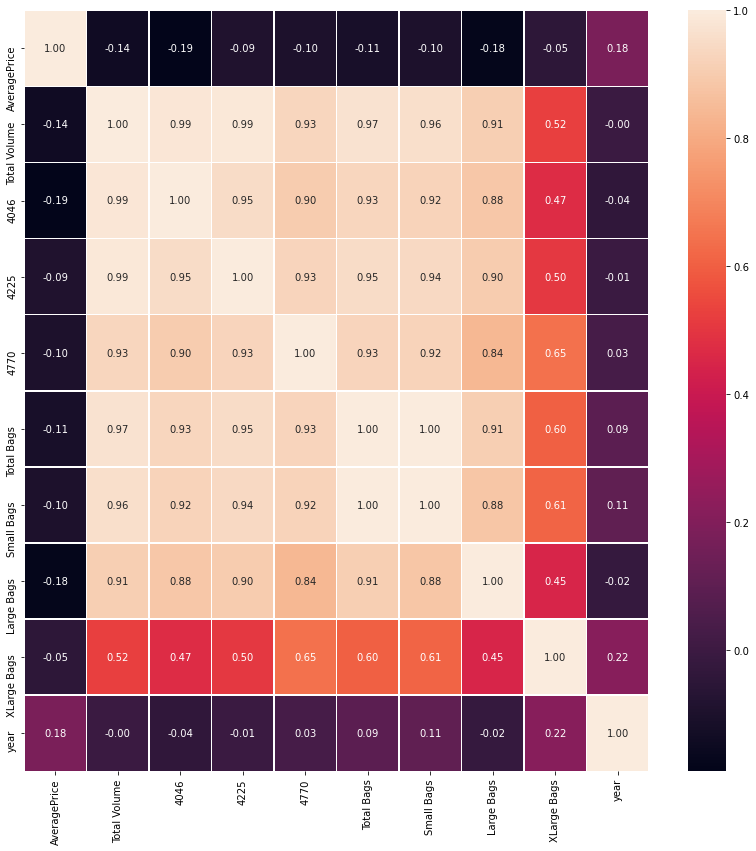

In [45]:
#lets plot  the correlation
fig, ax = plt.subplots(figsize = (14,14))
sns.heatmap(df_cls.corr(),
           annot = True,
           linewidth = .5,
           fmt = '.2f');

In [46]:
df_region = df_cls.groupby(['region'])['Total Volume'].sum().reset_index()
df_region

region  Total Volume
0                Albany  5.111443e+06
1               Atlanta  2.525241e+07
2   BaltimoreWashington  5.249687e+07
3                 Boise  5.268001e+06
4                Boston  3.431443e+07
5      BuffaloRochester  6.741403e+06
6            California  4.586810e+08
7             Charlotte  5.464623e+06
8               Chicago  1.867329e+07
9              Columbus  6.850740e+06
10        DallasFtWorth  2.032117e+07
11               Denver  1.722244e+07
12              Detroit  1.356261e+07
13          GrandRapids  4.390393e+06
14           GreatLakes  5.897445e+07
15   HarrisburgScranton  4.148077e+06
16  HartfordSpringfield  3.491504e+06
17              Houston  3.235137e+07
18         Indianapolis  2.520069e+06
19         Jacksonville  5.658909e+06
20             LasVegas  2.790102e+06
21           LosAngeles  8.196539e+06
22           Louisville  2.639857e+06
23    MiamiFtLauderdale  8.012470e+06
24             Midsouth  4.239178e+07
25            Nashville  4.186786e+06
26              NewYork  5.997083e+07
27            Northeast  4.159036e+07
28   NorthernNewEngland  1.148272e+07
29              Orlando  6.328122e+06
30         Philadelphia  5.003987e+06
31        PhoenixTucson  5.661233e+07
32           Pittsburgh  1.791478e+06
33               Plains  2.007570e+07
34             Portland  1.485553e+07
35    RaleighGreensboro  3.848596e+06
36      RichmondNorfolk  4.131917e+06
37              Roanoke  2.225069e+06
38             SanDiego  1.905142e+07
39         SanFrancisco  1.275176e+07
40              Seattle  4.405780e+06
41        SouthCarolina  8.010844e+06
42         SouthCentral  2.143828e+08
43            Southeast  2.749715e+07
44              Spokane  3.782042e+06
45              StLouis  3.111993e+06
46             Syracuse  9.229898e+05
47                Tampa  1.115006e+07
48              TotalUS  8.234286e+08
49                 West  2.006978e+08
50     WestTexNewMexico  2.322790e+07

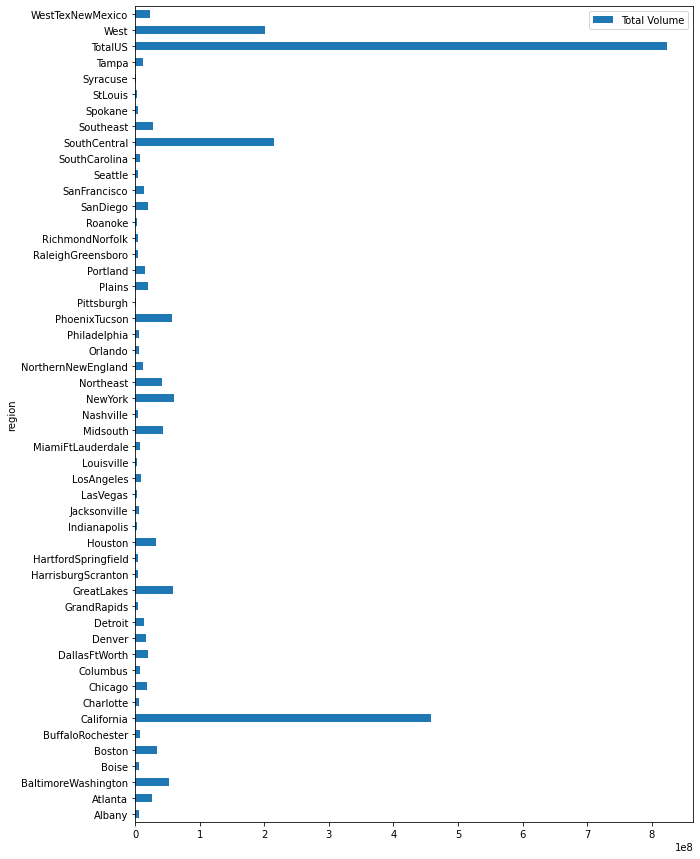

In [49]:
df_region.plot.barh(y = 'Total Volume', x = 'region', figsize = (10,15));

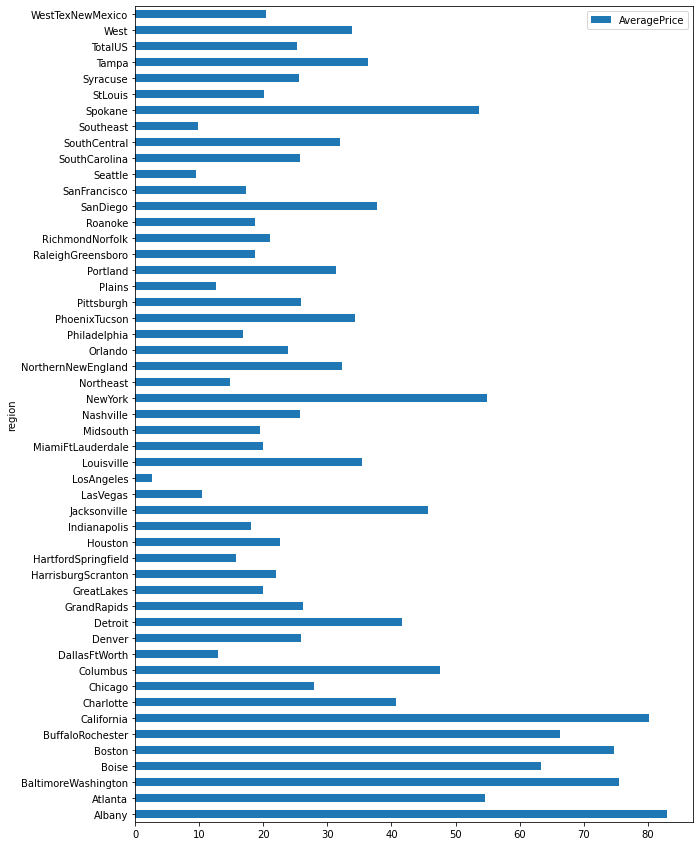

In [51]:
df_region_price = df_cls.groupby(['region'])['AveragePrice'].sum().reset_index()
df_region_price.plot.barh(x = 'region', y = 'AveragePrice', figsize = (10, 15));

**Observation**
* 1. `Albany` is getting more profit in selling avacado when compare to other countries
* 2. `Los Angels` is getting the least profit in selling the Avacados

In [52]:
df_plu = df_cls.groupby(['region'])['4046','4225','4770'].sum().reset_index()
df_plu

region          4046          4225         4770
0                Albany  1.160478e+05  4.144253e+06     36001.05
1               Atlanta  1.736038e+07  3.188675e+06     47617.71
2   BaltimoreWashington  3.811506e+06  3.420130e+07   2479680.24
3                 Boise  2.781901e+06  4.200372e+05    372529.65
4                Boston  4.619336e+05  2.495051e+07   1315901.45
5      BuffaloRochester  8.039075e+04  3.253675e+06      9980.56
6            California  1.831613e+08  1.508466e+08  17123902.95
7             Charlotte  1.343049e+06  1.395879e+06    928069.90
8               Chicago  8.773167e+05  1.306783e+07   2467283.51
9              Columbus  3.295324e+06  1.519929e+06    877802.21
10        DallasFtWorth  1.240657e+07  6.012866e+06    215896.89
11               Denver  3.635537e+06  1.069582e+07    224619.92
12              Detroit  5.094750e+06  2.406377e+06   3160255.65
13          GrandRapids  9.204009e+04  2.585600e+06    232733.76
14           GreatLakes  1.017376e+07  3.096142e+07   5415195.19
15   HarrisburgScranton  6.912922e+05  2.097216e+06     10649.17
16  HartfordSpringfield  5.778584e+04  2.855000e+06      3699.10
17              Houston  1.722505e+07  1.141206e+07    129823.06
18         Indianapolis  1.020425e+05  1.662652e+06    108635.80
19         Jacksonville  3.684377e+06  5.747787e+05     31533.31
20             LasVegas  1.113440e+06  1.249351e+06     59499.30
21           LosAngeles  5.549340e+06  1.667771e+06    182482.92
22           Louisville  9.088754e+04  1.627948e+06    127126.13
23    MiamiFtLauderdale  5.830233e+06  7.673241e+05      1262.83
24             Midsouth  9.037720e+06  2.093670e+07   3401026.00
25            Nashville  2.840033e+06  2.722957e+05    302485.89
26              NewYork  8.997909e+05  4.629976e+07     84873.78
27            Northeast  1.288234e+06  2.913542e+07     87019.64
28   NorthernNewEngland  7.988836e+04  9.390599e+06    106475.14
29              Orlando  4.404538e+06  5.816530e+05      5555.16
30         Philadelphia  2.513873e+05  3.311805e+06     18335.26
31        PhoenixTucson  4.026910e+07  1.114520e+07    431159.51
32           Pittsburgh  2.984361e+04  1.163948e+06     34690.73
33               Plains  1.111671e+07  5.870365e+06    155802.31
34             Portland  4.320693e+06  6.141888e+06    535502.50
35    RaleighGreensboro  9.940600e+05  1.024928e+06    710838.24
36      RichmondNorfolk  1.374691e+06  1.794827e+06    235108.37
37              Roanoke  9.237964e+05  7.754488e+05      1773.04
38             SanDiego  9.798123e+06  6.479201e+06    641372.79
39         SanFrancisco  2.833904e+06  8.306641e+06    340247.78
40              Seattle  1.011695e+06  1.544651e+06     80209.97
41        SouthCarolina  4.715568e+06  1.153152e+06    413542.08
42         SouthCentral  1.200404e+08  6.338604e+07   4289910.86
43            Southeast  1.976125e+07  2.543715e+06    215633.18
44              Spokane  1.472627e+06  1.501331e+06    149988.69
45              StLouis  1.760851e+06  5.952587e+05       896.36
46             Syracuse  2.100615e+04  4.692983e+05       516.71
47                Tampa  6.237397e+06  1.757663e+06      6302.99
48              TotalUS  3.556451e+08  3.109720e+08  23752276.95
49                 West  8.456202e+07  7.344458e+07   4483050.88
50     WestTexNewMexico  1.592083e+07  3.987451e+06    418359.45

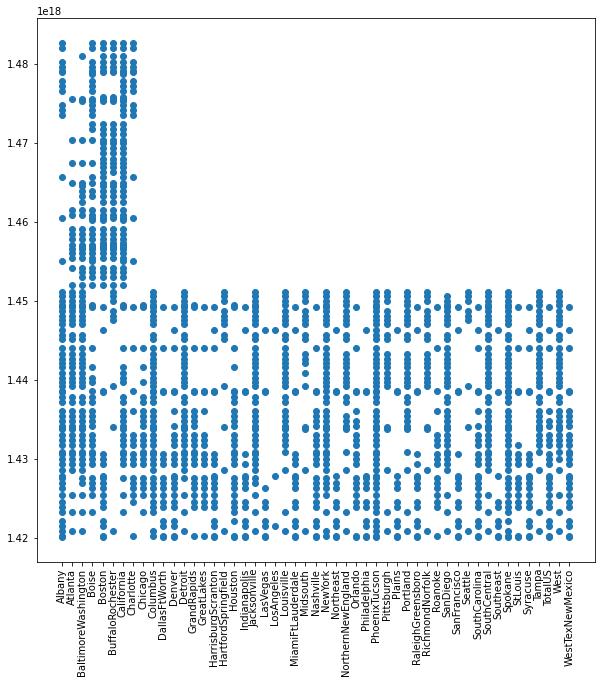

In [58]:
df_cls['Date'] = df_cls['Date'].astype('int64')
fig, ax = plt.subplots(figsize = (10,10))
plt.scatter(x = df_cls['region'], y = df_cls['Date'])
plt.xticks(rotation = 90);

In [63]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   float64
 10  region        1517 non-null   object 
dtypes: float64(10), object(1)
memory usage: 142.2+ KB


In [64]:
lb = LabelEncoder()
df_cls['region'] = lb.fit_transform(df_cls['region'])

In [65]:
df_cls.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [82]:
#lets treat the skewness
for cols in df_cls.columns:
    if df_cls.skew().loc[cols] > 0.5:
        df_cls[cols] = np.sqrt(df_cls[cols])

In [83]:
df_cls.skew()

AveragePrice   -0.109444
Total Volume    0.680824
4046            0.163511
4225            0.446312
4770            0.296215
Total Bags      0.711661
Small Bags      0.729019
Large Bags     -0.599991
XLarge Bags     0.254367
year            0.000000
region          0.288146
dtype: float64

## Building Model

In [85]:
from sklearn.preprocessing import StandardScaler
#lets split the data
X = df_cls.drop('region', axis =1)
y = df_cls['region']

#lets normalize the data
sd = StandardScaler()
X_new = sd.fit_transform(X)

#lets train & test x and y
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                   y,
                                                   test_size = 0.2)

In [97]:
model = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC()]
for mod in model:
    mod.fit(X_train, y_train)
    pred_y = mod.predict(X_test)
    print('Model Name :', mod)
    print('Accuracy Score :',  accuracy_score(y_test, pred_y))
    print('Precision score :',  precision_score(y_test, pred_y,
                                           average='micro'))
    print('recall_score : ',recall_score(y_test,pred_y,  
                                           average='micro'))
    print('f1_score : ', f1_score(y_test, pred_y,  
                                           average='micro'))
    print('\n')

Model Name : LogisticRegression()
Accuracy Score : 0.9046052631578947
Precision score : 0.9046052631578947
recall_score :  0.9046052631578947
f1_score :  0.9046052631578947


Model Name : KNeighborsClassifier()
Accuracy Score : 0.8980263157894737
Precision score : 0.8980263157894737
recall_score :  0.8980263157894737
f1_score :  0.8980263157894738


Model Name : DecisionTreeClassifier()
Accuracy Score : 0.8092105263157895
Precision score : 0.8092105263157895
recall_score :  0.8092105263157895
f1_score :  0.8092105263157895


Model Name : SVC()
Accuracy Score : 0.8717105263157895
Precision score : 0.8717105263157895
recall_score :  0.8717105263157895
f1_score :  0.8717105263157895




## Ensemble Technique

In [100]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)
pred_Rfc  =Rfc.predict(X_test)
print('Accuracy Score :',  accuracy_score(y_test, pred_Rfc))
print('Precision score :',  precision_score(y_test, pred_Rfc,average='micro'))
print('recall_score : ',recall_score(y_test,pred_Rfc, average='micro'))  
print('f1_score : ', f1_score(y_test, pred_Rfc, average='micro')) 
                                          

Accuracy Score : 0.9407894736842105
Precision score : 0.9407894736842105
recall_score :  0.9407894736842105
f1_score :  0.9407894736842105


## Boosting Technique

In [105]:
ADC = AdaBoostClassifier(base_estimator = LogisticRegression(), learning_rate = 0.1,algorithm='SAMME', random_state = 42 )
ADC.fit(X_train, y_train)
pred_adc = ADC.predict(X_test)
print('Accuracy Score :',  accuracy_score(y_test, pred_adc))
print('Precision score :',  precision_score(y_test, pred_adc,average='micro'))
print('recall_score : ',recall_score(y_test,pred_adc, average='micro'))  
print('f1_score : ', f1_score(y_test, pred_adc, average='micro')) 


Accuracy Score : 0.625
Precision score : 0.625
recall_score :  0.625
f1_score :  0.625


In [110]:
#From this experimentation I can see that ensemble technique is performing  better so I will go with ensemble technique
max_acc_score = 0
for r_state in range(42,100):
    X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                       y,
                                                       random_state = r_state,
                                                       test_size = 0.2)
    Rfc = RandomForestClassifier()
    Rfc.fit(X_train, y_train)
    y_pred = Rfc.predict(X_test)
    acc_scr = accuracy_score(y_test, y_pred)
    if acc_scr > max_acc_score:
        max_acc_score = acc_scr
        final_r_state = r_state
print('maximum r2_score corresponding to the random state of ', final_r_state, 'is', max_acc_score)  

maximum r2_score corresponding to the random state of  60 is 0.9901315789473685


In [109]:
cross_val_score(Rfc,X_new, y, cv = 5, scoring = 'accuracy')

array([0.85197368, 0.94407895, 0.9339934 , 0.95049505, 0.9009901 ])

* We can see that model is performing well

In [112]:
Rfc = RandomForestClassifier(random_state = 60)
Rfc.fit(X_train, y_train)
pred_rfc = Rfc.predict(X_test)
print('Accuracy Score :',  accuracy_score(y_test, pred_rfc))
print('Precision score :',  precision_score(y_test, pred_rfc,average='micro'))
print('recall_score : ',recall_score(y_test,pred_rfc, average='micro'))  
print('f1_score : ', f1_score(y_test, pred_rfc, average='micro')) 

Accuracy Score : 0.9638157894736842
Precision score : 0.9638157894736842
recall_score :  0.9638157894736842
f1_score :  0.9638157894736842


In [114]:
#lets check its metrics
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89         8
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        19
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.96        13
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         3
           9       0.92      1.00      0.96        11
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3
          17       0.80    

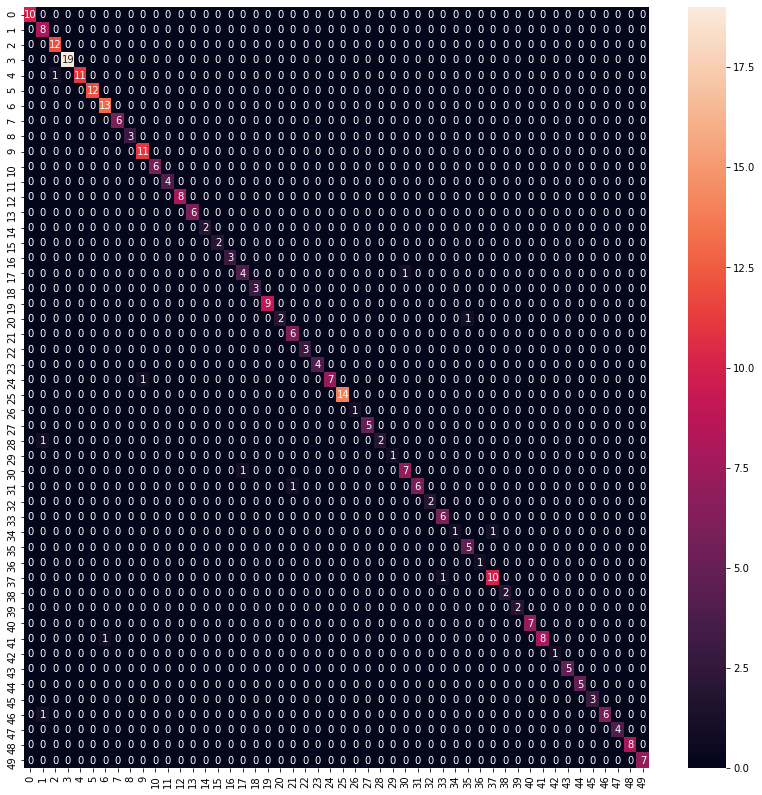

In [119]:
fig, ax= plt.subplots(figsize = (14,14))
sns.heatmap(confusion_matrix(y_test, pred_rfc),
            annot = True);

# Saving model

In [121]:
import joblib
joblib.dump(Rfc, 'Avacado-classifier.pkl')

['Avacado-classifier.pkl']